In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('fivethirtyeight')
np.random.seed(4211)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

data = pd.read_csv('historical_pricing_data.csv')
# Remove first column
data = data.drop(data.columns[0], axis=1)
data.set_index("date", inplace=True)
data[:5]

,ADA-USD,AVAX-USD,BNB-USD,BTC-USD,ETH-USD,LEO-USD,LINK-USD,LTC-USD,SOL-USD,TRX-USD,...,Willis Towers Watson,"Workday, Inc.",Wynn Resorts,Xcel Energy,Xylem Inc.,Yum! Brands,Zebra Technologies,Zimmer Biomet,Zoetis,eBay
date,,,,,,,,,,,,,,,,,,,,,
2024-03-17,0.681099,58.115814,571.085571,68390.625000,3642.413086,6.130970,18.674498,85.857529,202.123566,0.126198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-18,0.661258,60.689945,554.557129,67548.593750,3517.985107,6.164196,18.324354,87.112206,195.992752,0.124096,...,270.452423,272.600006,97.729019,50.233215,126.075180,133.648163,285.970001,124.885475,168.888809,50.412636
2024-03-19,0.586914,53.525894,507.076569,61912.773438,3157.618164,6.150208,16.809296,78.586372,170.016281,0.112382,...,269.583252,273.239990,98.628792,50.609673,127.024529,134.648514,285.190002,125.579514,171.134857,50.874058
2024-03-20,0.639481,57.030720,556.700500,67913.671875,3513.393066,6.168459,18.406483,84.789017,191.549622,0.120922,...,271.331451,276.410004,98.955093,50.754463,127.281647,133.883514,285.809998,125.450615,169.185654,51.021324
2024-03-21,0.631868,53.865566,553.248230,65491.390625,3492.991211,6.078223,18.431383,85.701622,179.220749,0.121126,...,271.133911,276.489990,98.836433,50.484180,128.547424,133.942398,295.059998,125.986000,166.543823,51.050774


In [11]:
#For each column, calculate percentage change from pervious row. Then, if the original column have NaN, change the corresponding values in NaN too
#Note: DO NOT RUN THIS CELL MORE THAN ONCE
for col in data.columns:
    new_col = data[col].pct_change()
    data[col] = new_col.mask(data[col].isnull(), None)
print(data.iloc[:5,:5])

/var/folders/hn/splrxx0j4dl5472qpl_gtjf80000gn/T/ipykernel_4552/843680270.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  new_col = data[col].pct_change()
/var/folders/hn/splrxx0j4dl5472qpl_gtjf80000gn/T/ipykernel_4552/843680270.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  new_col = data[col].pct_change()
/var/folders/hn/splrxx0j4dl5472qpl_gtjf80000gn/T/ipykernel_4552/843680270.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fi

             ADA-USD  AVAX-USD   BNB-USD   BTC-USD   ETH-USD
date                                                        
2024-03-17       NaN       NaN       NaN       NaN       NaN
2024-03-18 -0.029131  0.044293 -0.028942 -0.012312 -0.034161
2024-03-19 -0.112428 -0.118043 -0.085619 -0.083434 -0.102436
2024-03-20  0.089565  0.065479  0.097863  0.096925  0.112672
2024-03-21 -0.011905 -0.055499 -0.006201 -0.035667 -0.005807


/var/folders/hn/splrxx0j4dl5472qpl_gtjf80000gn/T/ipykernel_4552/843680270.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  new_col = data[col].pct_change()
/var/folders/hn/splrxx0j4dl5472qpl_gtjf80000gn/T/ipykernel_4552/843680270.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  new_col = data[col].pct_change()
/var/folders/hn/splrxx0j4dl5472qpl_gtjf80000gn/T/ipykernel_4552/843680270.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fi

The following code is to generate randomly weighted portfolio to plot and measure Sharpe ratios.
If thousands of portfolios are generated, we should get very close to an optimized portfolio.

The following code takes the sum of mean returns generated by the stocks for an average trading
year (252 days). It then calculates the standard deviation of each portfolio.

In [3]:
def portfolio_annualised_performance(weights, 
                                     mean_returns, 
                                     cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

The function beolow gets many portfolios

In [5]:
def random_portfolios(num_portfolios:int, 
                      mean_returns, 
                      cov_matrix, 
                      risk_free_rate:float):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in tqdm(range(num_portfolios)):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

The original tutorial gave 25000. However, they only had 4 assets. We have more. So we shall do a lot more, a lot more... Fortunately, this scales in O(n) time.

ASSUMPTION: Follow risk free rate stated here: 
https://ycharts.com/indicators/10_year_treasury_rate

In [12]:
mean_returns = data.mean()
cov_matrix = data.cov()
securities = data.columns
del data

num_portfolios = 25000*100
risk_free_rate = 0.0431

Below is the code needed to calculate the returns, standard deviation, volatility, and sharpe ratio
of the generated portfolios. There are print statements to display the portfolio with the maximum
sharpe ratio and it's annual return as well as the portfolio with the minimum volatility and its
annual return. There is also a command to display the graph of the generated portfolios and the 
portfolio allocations.

In [13]:
def display_simulated_ef_with_random(mean_returns,
                                     cov_matrix,
                                     num_portfolios:int,
                                     risk_free_rate:float):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=securities,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=securities,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print("Annualised Volatility:", round(sdp,2))
    print("\n")
    print("This should be 100 or close to 100:",max_sharpe_allocation.sum(axis=1))
    print(max_sharpe_allocation)
    # Create a csv file for the maximum sharpe ratio portfolio allocation
    max_sharpe_allocation.to_csv('max_sharpe_allocation.csv')

    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    plt.show()

100%|██████████| 2500000/2500000 [14:16<00:00, 2919.32it/s]


--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.12
Annualised Volatility: 0.12


This should be 100 or close to 100: allocation    99.96
dtype: float64
            ADA-USD  AVAX-USD  BNB-USD  BTC-USD  ETH-USD  LEO-USD  LINK-USD  \
allocation     0.07      0.02     0.13     0.15     0.01     0.35      0.15   

            LTC-USD  SOL-USD  TRX-USD  ...  Willis Towers Watson  \
allocation     0.11     0.01     0.24  ...                  0.36   

            Workday, Inc.  Wynn Resorts  Xcel Energy  Xylem Inc.  Yum! Brands  \
allocation           0.05          0.31         0.24        0.09         0.29   

            Zebra Technologies  Zimmer Biomet  Zoetis  eBay  
allocation                0.34           0.03    0.38  0.17  

[1 rows x 511 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.0

/Users/joshuakoh/cryptoto/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


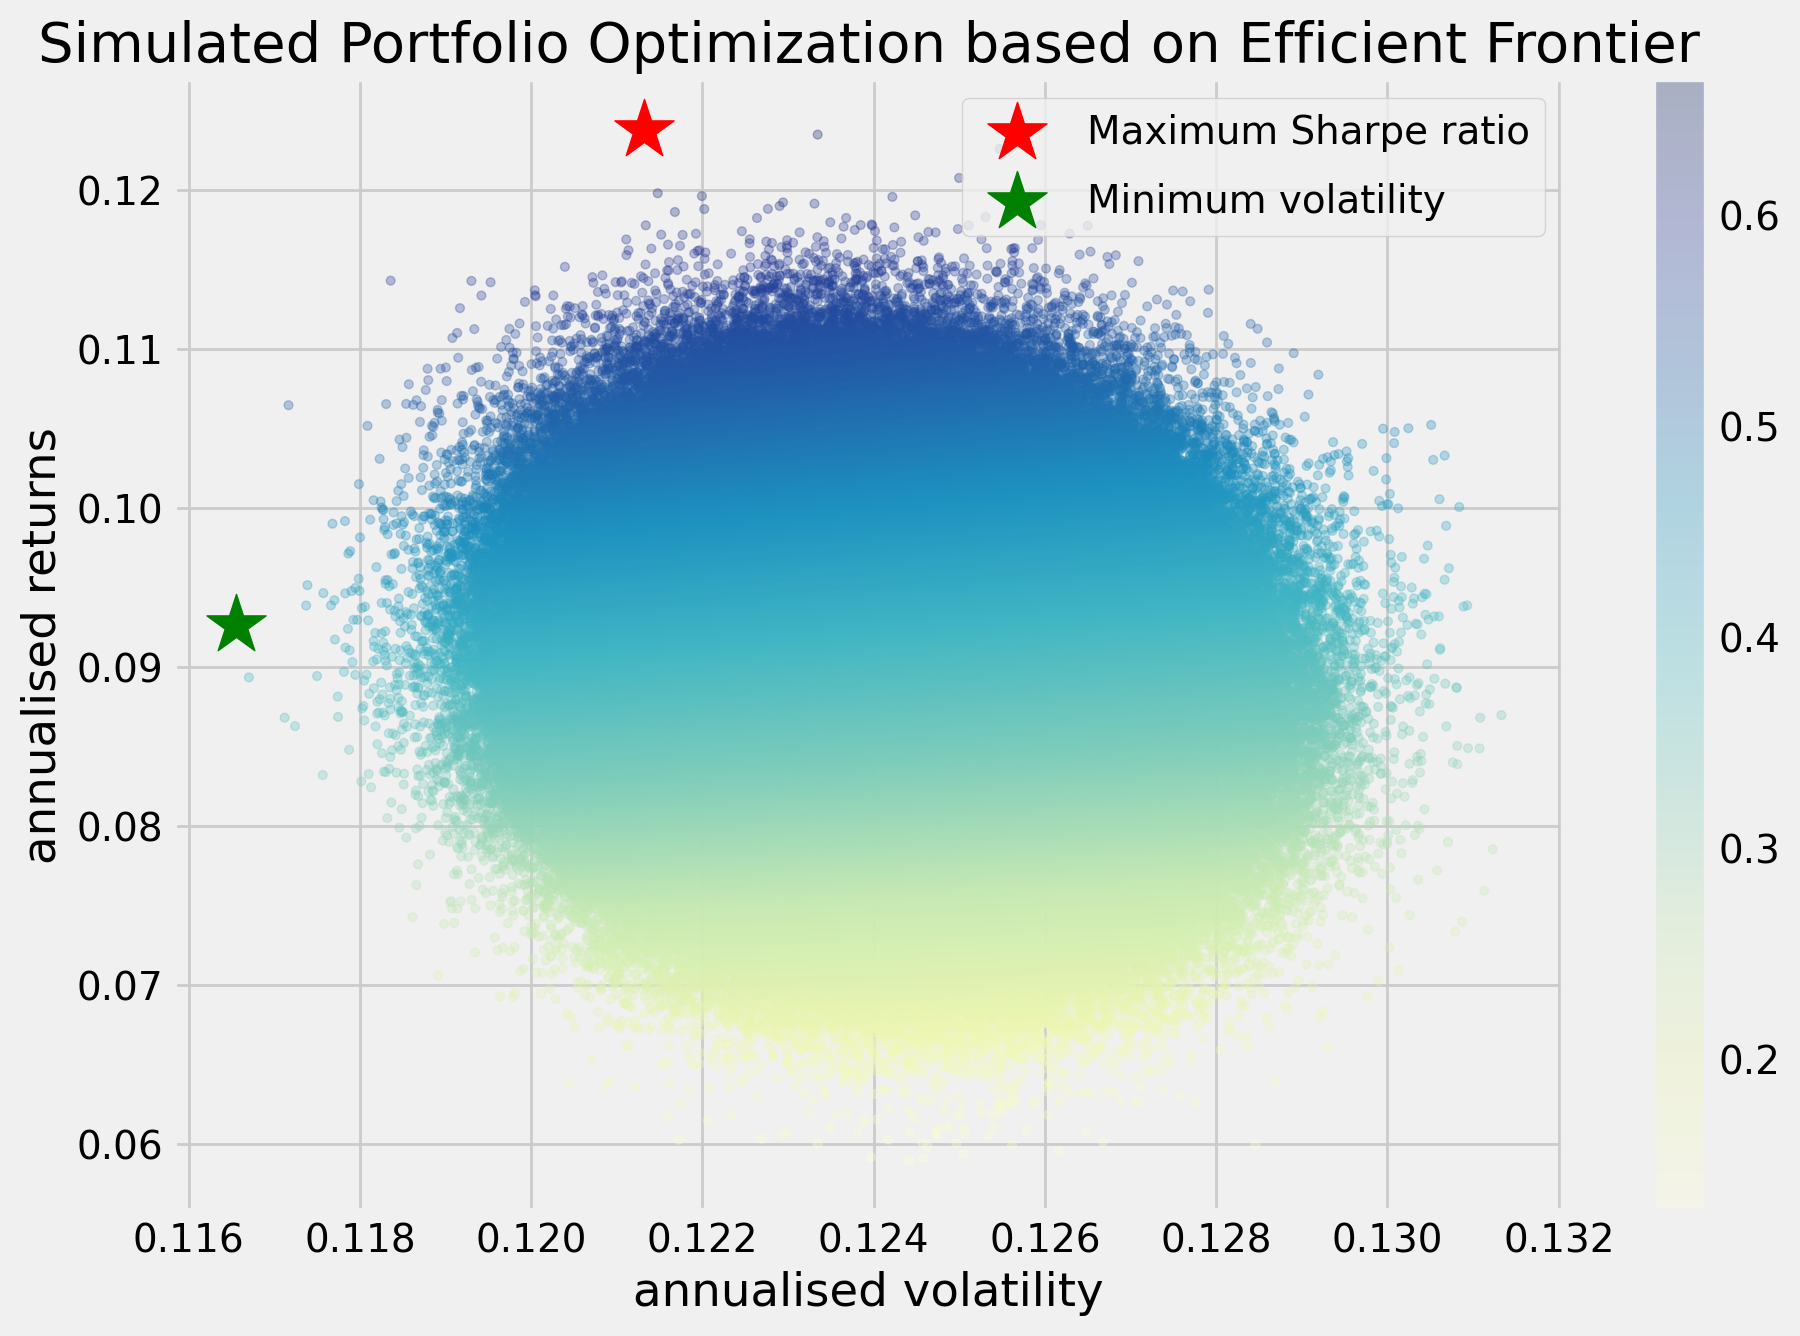

In [14]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)